In [8]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib tabulate scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, binom, poisson, uniform, norm, expon
from tabulate import tabulate
from IPython.display import HTML, display
from collections import Counter
from collections import defaultdict
import math
from typing import List

In [9]:
data_sets_files = ["set_1.csv", "set_2.csv", "set_3.csv"]
data_sets = [pd.read_csv(filename, header=None).values.flatten() for filename in data_sets_files]

In [10]:
def plotting_dataset(dataset: List[float] | List[int], bins_count: int, data_percent: float):
    
    N = len(dataset)
    n = math.ceil(1 + 1.14 * math.log(N))
    
    min_val = min(dataset)
    max_val = max(dataset)
    
    step = (max_val - min_val) / n

    print(n, min_val, max_val, step)

    intervals = defaultdict(int)
    
    for val in dataset:
        index = math.ceil((val - min_val) / step)
        intervals[index] += 1

    keys = sorted(intervals.keys())
    intervals = {key: intervals[key] for key in sorted(intervals)}
    
    for val in keys:
        if intervals[val] / N < data_percent:
            intervals.pop(val)

    keys = sorted(intervals.keys())

    max_val = keys[len(keys) - 1] * step + min_val
    min_val = keys[0] * step + min_val

    plt.hist([val for val in dataset if val <= max_val and val >= min_val], bins=bins_count, color="red", edgecolor="black", linewidth=1.2)

    plt.title("Гистограмма")
    plt.xlabel("Значения")
    plt.ylabel("Частота")

    plt.show()


15 1 66 4.333333333333333


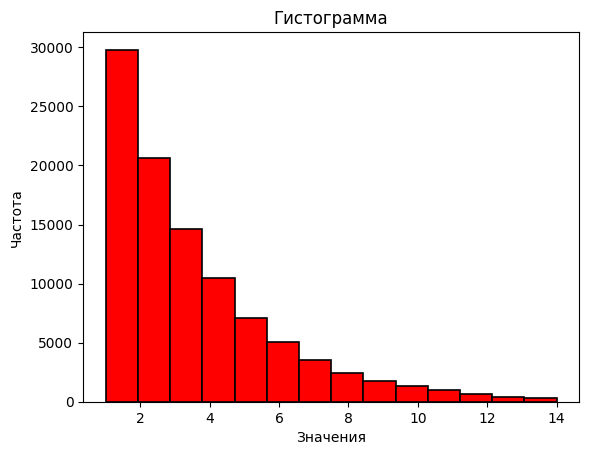

In [11]:
plotting_dataset(data_sets[0], 14, 0.03)

12 -1071.786686 698.777979 147.54705541666667


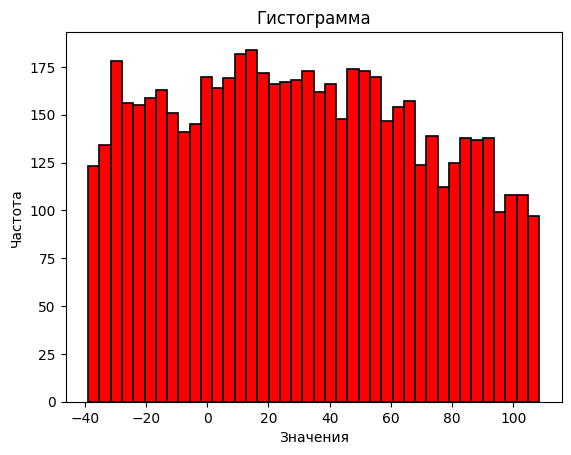

In [22]:
plotting_dataset(data_sets[1], 40, 0.2)

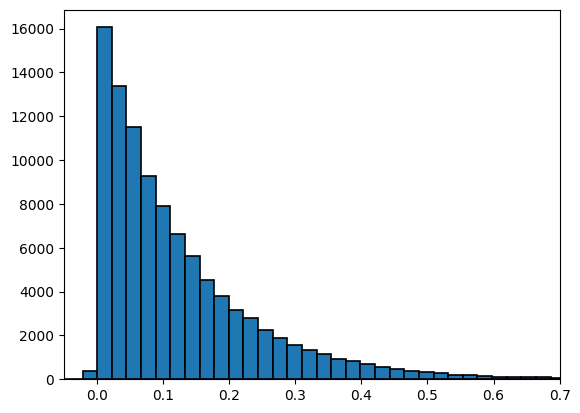

In [6]:
bins = 200
width = 0.8
data_set = data_sets[2]
plt.hist(data_set, bins=bins, edgecolor='black', linewidth=1.2)
    
min_val = -0.05
max_val = 0.7
plt.xlim(min_val, max_val)
    
bin_width = (max_val - min_val) / bins
    
positions = [min_val + bin_width * i for i in range(bins)]
    
for pos in positions:
    rect = plt.Rectangle((pos - width / 2, 0), width, 0, alpha=0.7)
    plt.gca().add_patch(rect)
    
plt.show()

In [7]:


plt.hist(data_set_3, bins=10, density=True, alpha=0.5)

plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма данных из set_3.csv')

plt.show()

NameError: name 'data_set_3' is not defined

In [ ]:
def mean(values):
    if not values:
        return None
    return sum(values) / len(values)

def variance(data, mean):
    n = len(data)
    if n < 2:
        raise ValueError("The data should contain at least two elements.")
    
    squared_diffs = [(x - mean) ** 2 for x in data]
    return np.sum(squared_diffs) / (n - 1)

mean_arr = [mean(data_set.tolist()) for data_set in data_sets]
variance_arr = [variance(data_set.tolist(), mean_set) for data_set, mean_set in zip(data_sets, mean_arr)]

data = {
    'Headers': data_sets_files,
    'Mean': mean_arr,
    'Variance': variance_arr
}
table = f"""<table>
<tr>
<th></th>
{[f"<th>{header}</th>" for header in data_sets_files]}
</tr>
<tr>
<td>Mean</td>
{[f"<td>{mean}</td>" for mean in data["Mean"]]}
</tr>
<tr>
<td>Variance</td>
{[f"<td>{variance}</td>" for variance in data["Variance"]]}
</tr>
</table>"""

display(HTML(table))

In [ ]:
random_geom = [geom.rvs(0.5, size=len(data_set)) for data_set in data_sets]
random_binom = [binom.rvs(10, 0.3, size=len(data_set))for data_set in data_sets]
random_poisson = [poisson.rvs(5, size=len(data_set)) for data_set in data_sets]
random_uniform = [uniform.rvs(0, 10, size=len(data_set))for data_set in data_sets]
random_norm = [norm.rvs(5, 2, size=len(data_set)) for data_set in data_sets]
random_expon = [expon.rvs(1, size=len(data_set)) for data_set in data_sets]

In [ ]:
for geom in random_geom:
    plt.hist(random_geom, bins=15, density=True, alpha=0.5)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.title('Гистограмма для геометрического распределения')
    plt.show()

In [ ]:
for bi
plt.hist(random_binom, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для биномиального распределения')
plt.show()

In [ ]:
plt.hist(random_poisson, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для распределения Пуассона')
plt.show()

In [ ]:
plt.hist(random_uniform, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для равномерного распределения')
plt.show()

In [ ]:
plt.hist(random_norm, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для нормального распределения')
plt.show()

In [ ]:
plt.hist(random_expon, bins=15, density=True, alpha=0.5)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Гистограмма для экспоненциального распределения')
plt.show()